In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
original_data = pd.read_excel("Cell-Cycle-Set.xlsx")
df = original_data.dropna()

#view the head so we can determine the column names and get a feel for the data
df.head()

#each of the columns detail the concentration of RNA/protein during one of the 3 phases

#G1 phase is first growth phase/post mitotic gap phase
#S phase is DNA replication phase
#G2 phase is growth phase

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...


## Task 1

- Let's render histograms for the RNA and protein data in the G1, S and G2 phases:

Text(0.5, 0, 'Mean G2 Expression')

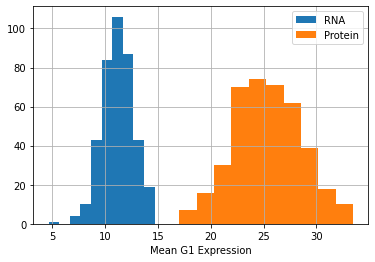

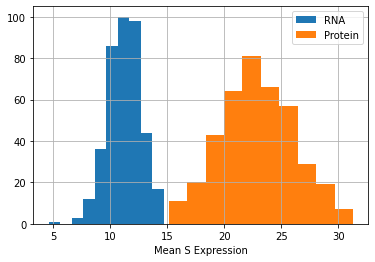

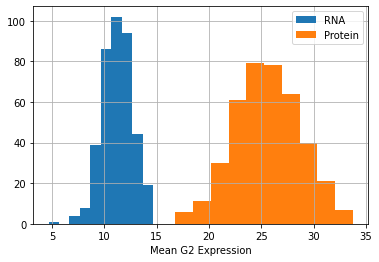

In [14]:
fig1, ax1 = plt.subplots()

#.hist draws histogram on a pandas series using matplotlib
#default bin size is 10
df.mean_RNA_G1.hist(ax=ax1, label='RNA', bins = 10)
df.mean_protein_G1.hist(ax=ax1, label='Protein', bins = 10)

#puts a colour coded legend of what each data set is
ax1.legend()

#set the label of the x axis
ax1.set_xlabel('Mean G1 Expression')

fig2, ax2 = plt.subplots()
df.mean_RNA_S.hist(ax=ax2, label='RNA')
df.mean_protein_S.hist(ax=ax2, label='Protein')
ax2.legend()
ax2.set_xlabel('Mean S Expression')

fig3, ax3 = plt.subplots()
df.mean_RNA_G2.hist(ax=ax3, label='RNA')
df.mean_protein_G2.hist(ax=ax3, label='Protein')
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

- From the above, straight away we can notice that in every phase there is a higher protein concentration than RNA. This could be due to the fact that a single mRNA strand used by ribosomes to create a protein could be used to create the same protein multiple times
- Now, if we apply a linear scalar to the RNA data from each phase and make the histogram reperesenting protein data slightly transparent in order to visualize how the data overlap, we can observe that the distributions of the RNA and protein data from each phase are similar apart from the S phase, where the RNA data is slightly more negatively skewed than in other phases. 
- The negative skew of data in the S phase suggests there is a higher than normal concentration of RNA during this phase than in the other 2 phases
- See below for the scaled data:

Text(0.5, 0, 'Mean G2 Expression')

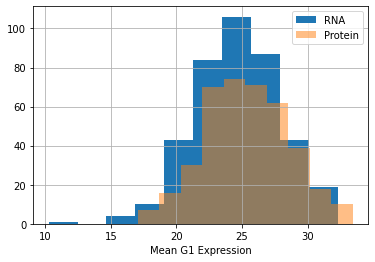

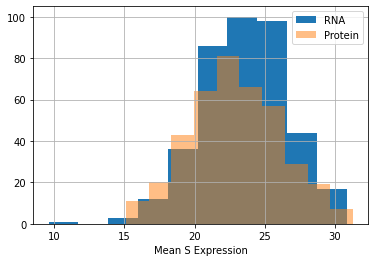

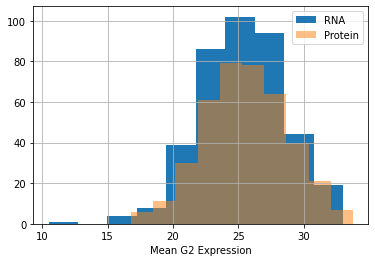

In [19]:
fig1, ax1 = plt.subplots()
df.mean_RNA_G1.map(lambda x: x * 2.2).hist(ax=ax1, label='RNA', bins = 10)
df.mean_protein_G1.hist(ax=ax1, label='Protein', bins = 10, alpha = 0.5)
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')

fig2, ax2 = plt.subplots()
df.mean_RNA_S.map(lambda x: x * 2.1).hist(ax=ax2, label='RNA')
df.mean_protein_S.hist(ax=ax2, label='Protein', alpha = 0.5)
ax2.legend()
ax2.set_xlabel('Mean S Expression')

fig3, ax3 = plt.subplots()
df.mean_RNA_G2.map(lambda x: x * 2.25).hist(ax=ax3, label='RNA')
df.mean_protein_G2.hist(ax=ax3, label='Protein', alpha = 0.5)
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

## Task 2

- We can see that when we look at the pairwise correlations accurate to 3 significant figures, there is only at most a difference of 0.01 in the spearmans rank score between any two phases in the pairwise correlation between RNA and protein concentration, hence the change in timestep has little effect on the relationship between the concentration amounts of RNA and protein

In [25]:
#pairwise correlation

print("G1 correlation:", "%0.3f" % df.mean_RNA_G1.corr(df.mean_protein_G1, method = "spearman"))
print("S correlation:", "%0.3f" % df.mean_RNA_S.corr(df.mean_protein_S, method = "spearman"))
print("G2 correlation:", "%0.3f" % df.mean_RNA_G2.corr(df.mean_protein_G2, method = "spearman"))

G1 correlation: 0.513
S correlation: 0.523
G2 correlation: 0.526


## Task 3

- Let's generate scatterplots of the RNA vs protein concentration for each stage:

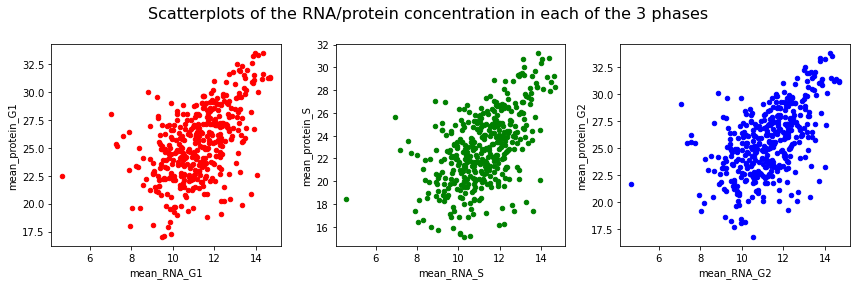

In [51]:
multiFig, multiAx = plt.subplots (ncols = 3, figsize= (12, 4))

df.plot.scatter("mean_RNA_G1", "mean_protein_G1", color = "r", ax = multiAx[0])
df.plot.scatter("mean_RNA_S", "mean_protein_S", color = "g", ax = multiAx[1])
df.plot.scatter("mean_RNA_G2", "mean_protein_G2", color = "b", ax = multiAx[2])

#make the plots spaced apart
multiFig.tight_layout()

multiFig.suptitle("Scatterplots of the RNA/protein concentration in each of the 3 phases", fontsize = 16)

#Make the title not overlapping
multiFig.subplots_adjust(top=0.85)



- Now, as before let's observe how the data look when overlayed onto one another:

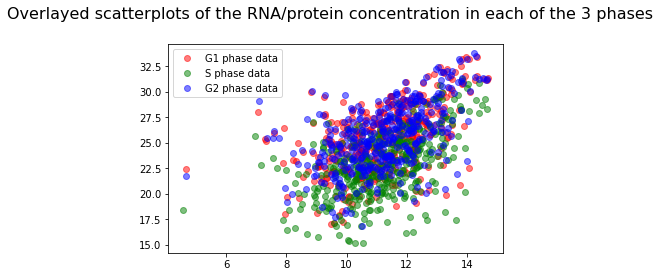

In [53]:
#scatterFig, scatterAxes = plt.subplots(ncols = 3, figsize = (12,4))

overlayFig, overlayAx = plt.subplots()

overlayAx.scatter(x = df.mean_RNA_G1, y = df.mean_protein_G1, color = "r", alpha = 0.5, label = "G1 phase data")
overlayAx.scatter(x = df.mean_RNA_S, y = df.mean_protein_S, color = "g", alpha = 0.5, label = "S phase data")
overlayAx.scatter(x = df.mean_RNA_G2, y = df.mean_protein_G2, color = "b", alpha = 0.5, label = "G2 phase data")
overlayAx.legend()

overlayFig.suptitle("Overlayed scatterplots of the RNA/protein concentration in each of the 3 phases", fontsize = 16)
overlayFig.subplots_adjust(top=0.85)

- As before, we can see that the distribution of data from each phase is fairly similar
- Now, let's use scikit-learn to train a linear regression models for each of the data sets from each phase:

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

- We can see that the data in question is a Pandas Series object of floats:

In [60]:
df.mean_RNA_G1

1      10.330107
2      12.321340
3      10.827333
5      10.845517
6       9.042438
         ...    
494    11.115773
495    11.251870
496    13.013263
497     9.048456
498    13.525467
Name: mean_RNA_G1, Length: 397, dtype: float64

- We know that the data is actually just a 1D list, so let's flatten the pandas series into a numpy array which is suitable for feeding to a scikit-learn model. Let's also randomly split each of the 3 rna/protein pairs into training and testing datasets, with the training datasets containing 90% of the original data and the testing datasets containing 10% of the original data:

In [92]:
def process_column(col):
    return col.to_numpy().reshape(-1,1)

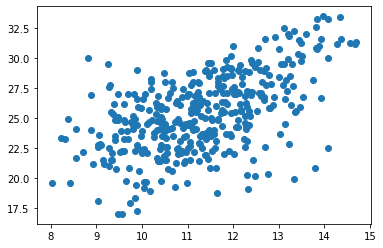

In [110]:
G1_cleaned = df[df.mean_RNA_G1 > 8]
plt.scatter(G1_cleaned.mean_RNA_G1, G1_cleaned.mean_protein_G1)

0.3089380822670228


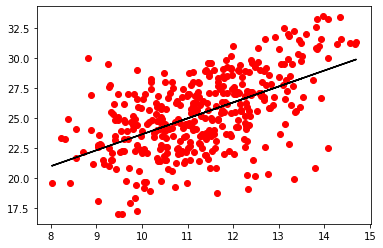

In [111]:

G1_rna, G1_protein = process_column(G1_cleaned.mean_RNA_G1), process_column(G1_cleaned.mean_protein_G1)
G1_model = LinearRegression().fit(G1_rna, G1_protein)

G1_protein_predictions = G1_model.predict(G1_rna)

plt.scatter(G1_rna, G1_protein, color = "r")
plt.plot(G1_rna, G1_protein_predictions, color = "k")

print(r2_score(G1_protein, G1_protein_predictions))

0.28750000422102284


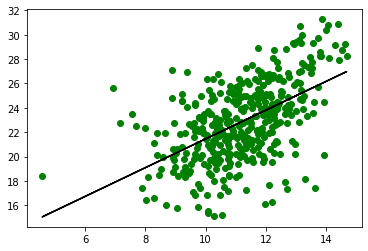

In [106]:
S_rna, S_protein = process_column(df.mean_RNA_S), process_column(df.mean_protein_S)
S_model = LinearRegression().fit(S_rna, S_protein)

S_protein_predictions = S_model.predict(S_rna)

plt.scatter(S_rna, S_protein, color = "g")
plt.plot(S_rna, S_protein_predictions, color = "k")

print(r2_score(S_protein, S_protein_predictions))

0.28362549895654476


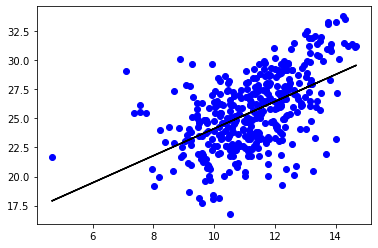

In [107]:
G2_rna, G2_protein = process_column(df.mean_RNA_G2), process_column(df.mean_protein_G2)
G2_model = LinearRegression().fit(G2_rna, G2_protein)

G2_protein_predictions = G2_model.predict(G2_rna)

plt.scatter(G2_rna, G2_protein, color = "b")
plt.plot(G2_rna, predictions, color = "k")

print(r2_score(G2_protein, G2_protein_predictions))